In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [9]:
import numpy as np
from scipy.stats import multivariate_normal as mvnorm
from scipy.stats import uniform, invgamma, bernoulli, poisson, norm
import statsmodels.api as sm
import pandas as pd
from src.preprocessing import prepare_data, MAR_data_deletion
from src.model_code import Gibbs_MH
from src.create_mnar import create_mnar
from src.diagnostics import MCMC_diagnostics
from statsmodels.tsa.stattools import acf 
import matplotlib.pyplot as plt
#import arviz as az

In [61]:
df = pd.read_csv('data/student-mat.csv', sep=";")

X_df, y_df = prepare_data(df)
X_df.head()

,intercept,age,sex_M,failures,higher_yes,Medu,absences,G2
0,1,18,0.0,0,1.0,4,6,6
1,1,17,0.0,0,1.0,1,4,5
2,1,15,0.0,3,1.0,1,10,8
3,1,15,0.0,0,1.0,4,2,14
4,1,16,0.0,0,1.0,3,4,10


In [62]:
prop = 0.05
X_missing = create_mnar(df=X_df, a0=-3, a1=0.01, share_yes=prop, share_no=prop/10)

In [67]:
X = X_missing
y = y_df.to_numpy()
B = 2000
thin = 10

In [68]:
(betas, sigmas2, higher_yes_sim, G2_sim, alphas, gammas, etas) = Gibbs_MH(X, y, B, thin)

100%|██████████| 39999/39999 [04:43<00:00, 141.07it/s]


In [11]:
betas_df = pd.DataFrame(betas.T, columns=[f"beta_{i}" for i in X_df.columns])
higher_yes_df = pd.DataFrame(higher_yes_sim.T, columns=[f"missing_higher_yes_{i}" for i in range(0, higher_yes_sim.shape[0])])
G2_df = pd.DataFrame(G2_sim.T, columns=[f"missing_G2_{i}" for i in range(0, G2_sim.shape[0])])
alphas_df = pd.DataFrame(alphas.T, columns=[f"alpha_{i}" for i in range(0, alphas.shape[0])])
gammas_df = pd.DataFrame(gammas.T, columns=[f"gamma_{i}" for i in range(0, gammas.shape[0])])
rest_df = pd.DataFrame({"sigmas2": sigmas2.T,
                        "eta2": etas.T})
              

In [12]:
results = pd.concat([betas_df , higher_yes_df, G2_df, alphas_df, gammas_df, rest_df], axis=1) 
results.head()
results.to_csv("results/04_mnar_results.csv")

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


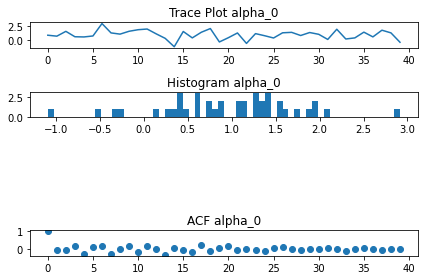

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


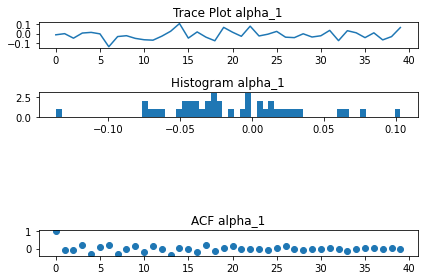

In [14]:
for i, alpha in enumerate(alphas):
    MCMC_diagnostics(alpha, f"alpha_{i}")

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


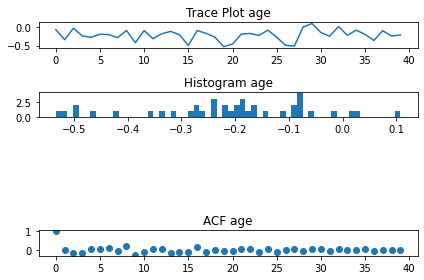

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


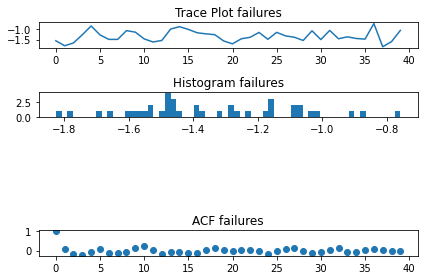

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


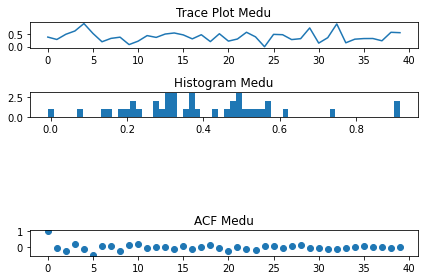

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


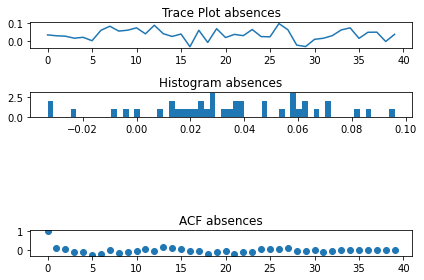

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


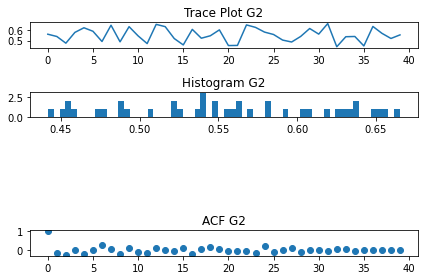

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


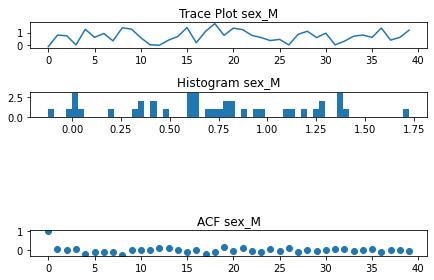

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


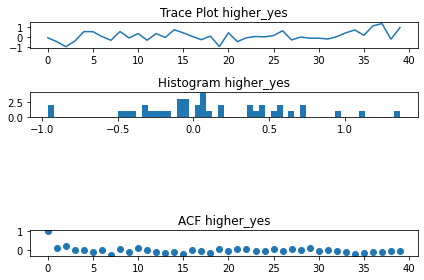

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


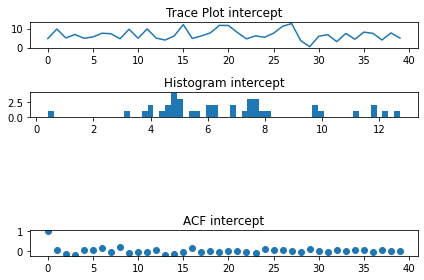

In [15]:
for i, beta in enumerate(betas):
    MCMC_diagnostics(beta, X_df.columns[i])

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


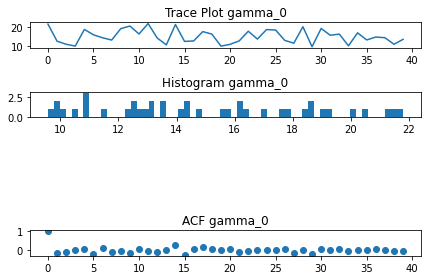

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


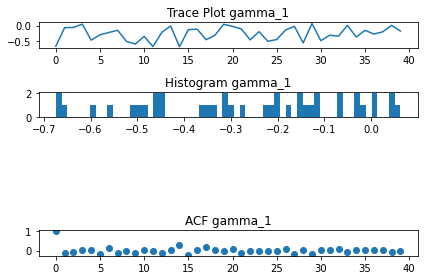

In [16]:
for i, gamma in enumerate(gammas):
    MCMC_diagnostics(gamma, f"gamma_{i}")

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


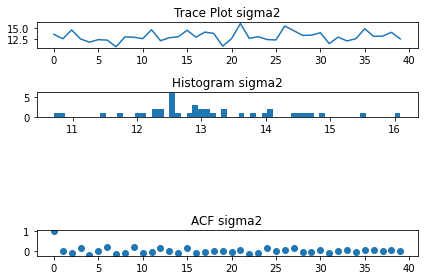

In [17]:
MCMC_diagnostics(sigmas2, "sigma2")

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


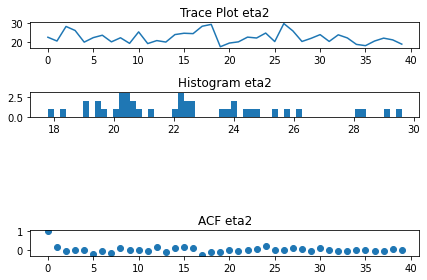

In [18]:
MCMC_diagnostics(etas, "eta2")

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


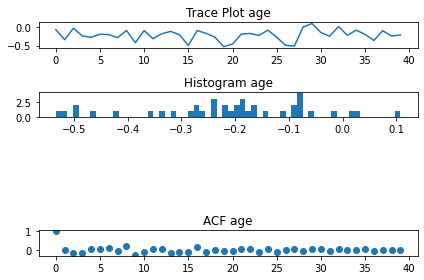

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


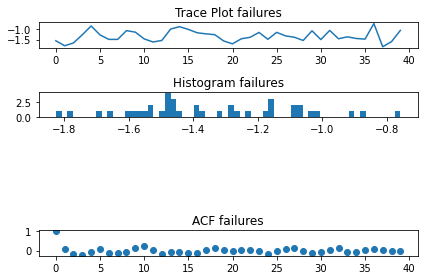

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


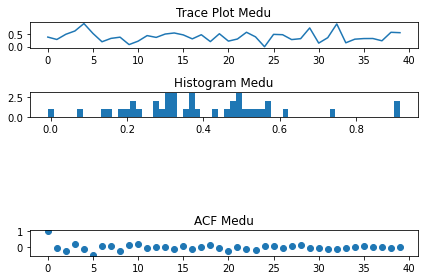

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


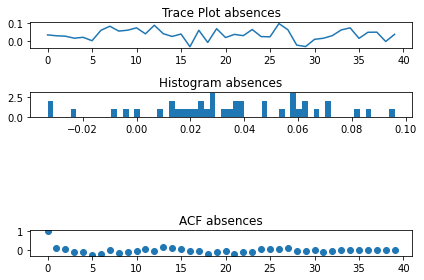

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


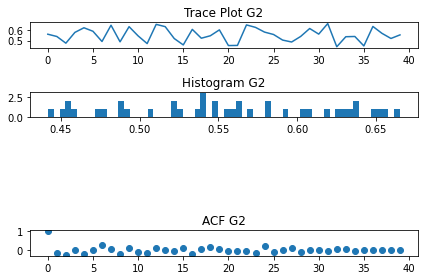

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


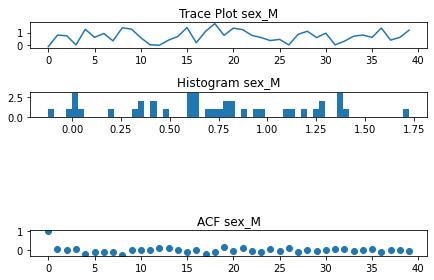

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


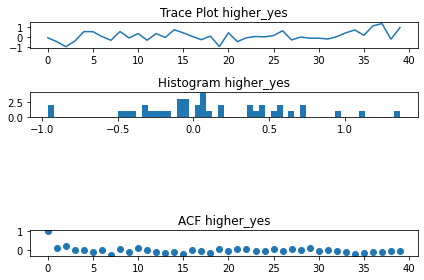

/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/Users/aaronwilliams/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


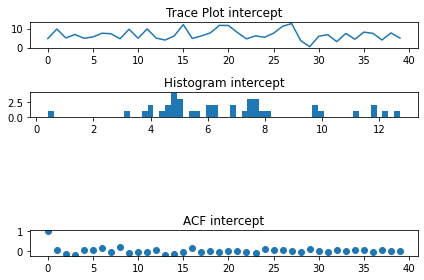

In [19]:
for i, beta in enumerate(betas):
    MCMC_diagnostics(beta, X_df.columns[i])

In [20]:
"""
# thin
betas_thin = betas[:, ::thin]
higher_yes_sim_thin = higher_yes_sim[:, ::thin]
absences_sim_thin = absences_sim[:, ::thin]
alphas0_thin = alphas0[::thin]
alphas1_thin = alphas1[::thin]
gammas0_thin = gammas0[::thin]
gammas1_thin = gammas1[::thin]
sigmas2_thin = sigmas2[::thin]
"""

'\n# thin\nbetas_thin = betas[:, ::thin]\nhigher_yes_sim_thin = higher_yes_sim[:, ::thin]\nabsences_sim_thin = absences_sim[:, ::thin]\nalphas0_thin = alphas0[::thin]\nalphas1_thin = alphas1[::thin]\ngammas0_thin = gammas0[::thin]\ngammas1_thin = gammas1[::thin]\nsigmas2_thin = sigmas2[::thin]\n'

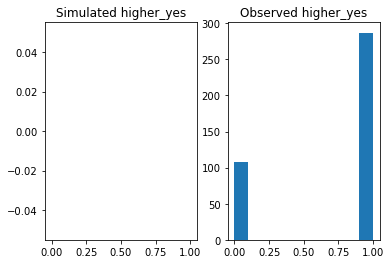

In [21]:
plt.subplot(121)
plt.hist(higher_yes_sim.flatten())
plt.title(f'Simulated higher_yes')


plt.subplot(122)
plt.hist(X.loc[:, "higher_yes"])
plt.title(f'Observed higher_yes')

plt.show()

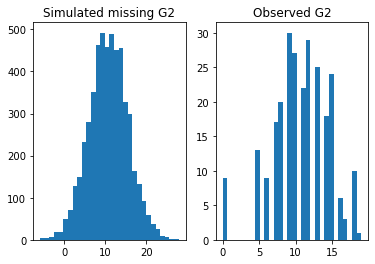

In [22]:
plt.subplot(121)
plt.hist(G2_sim.flatten(), bins=30)
plt.title(f'Simulated missing G2')

plt.subplot(122)
plt.hist(X.loc[:, "G2"], bins=30)
plt.title(f'Observed G2')
plt.show()


In [79]:
B=2000
thin = 10
y = y_df.to_numpy()
for a, prop, label in zip(
    [0.01, 0.065, 0.17, 0.27],
    [0.02, 0.07, 0.17, 0.27],
    [0.05, 0.1, 0.25, 0.5],
):
    np.random.seed(seed=420)
    X = create_mnar(df=X_df, a0=-3, a1=a, share_yes=prop, share_no=prop/10)
    # proportion missing
#     print("G2", X_missing['G2'].isna().sum()/n)
#     print("higher", X_missing['higher_yes'].isna().sum()/n)
    (betas, sigmas2, higher_yes_sim, G2_sim, alphas, gammas, etas) = Gibbs_MH(X, y, B, thin)
    results = pd.DataFrame(betas.T, columns = X_df.columns)
    results.to_csv(f'results/04_dists_{label}.csv', index=False)

100%|██████████| 39999/39999 [09:32<00:00, 69.84it/s]
